In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data_path = '/content/drive/MyDrive/CPE232/tracks.csv'
data_path = '/content/drive/MyDrive/Spotify/tracks.csv'#rof
# data_path = '/content/drive/MyDrive/tracks.csv/tracks.csv'#Ploy
# data_path = '/content/drive/MyDrive/Colab Notebooks/DataSet/tracks.csv' #non
df = pd.read_csv(data_path)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


| <h3>column name </h3>| <h3>meaning & description </h3>|
|-|-|
|id|id ของเพลง|
|name|ชื่อเพลง|
|popularity|ความนิยมของเพลงโดยมีค่าจาก 0 – 100 โดย 100 หมายความว่ามีความนิยมสูงสุด โดยคำนวณจากอัลกอริทึมโดยมาจากจำนวนการเล่นและเวลาที่เล่น ถ้าเป็นเพลงที่มีการเล่นเยอะในปัจจุบันจะมีค่า popularity สูงกว่าเพลงที่มีการเล่นเยอะในอดีต|
|duration_ms|ความยาวของเพลงในหน่วยมิลลิวินาที|
|explicit|เป็นเพลงที่มีเนื้อหาล่อแหลม; 1 = มี ; 0 = ไม่มี หรือ ไม่ทราบ|
|artists|ชื่อศิลปิน|
|id artists|id ของศิลปิน|
|release date|วันที่ปล่อยเพลง|
|danceability|ความเหมาะสมกับการเต้น มีค่า 0.0 – 1.0 โดย 1.0 หมายถึงเหมาะสมกับการเต้นที่สุด โดยคำนวณจากองค์ประกอบของดนตรีเช่น Tempo, Rhythm Stability, Beat Strength และ Regularity|
|energy|Energy ของเพลงโดยหมายถึงความหนักแน่นและลักษณะของเพลงมีค่า 0.0 – 1.0 โดย 1.0 หมายความว่า Energy สูงสุด เช่น เพลงที่มีความเร็วสูง เสียงดัง และวุ่นวาย เพลงที่มี Energy ต่ำเช่น Mozart เป็นต้น|
|key|คีย์ของเพลงโดยเป็น Pitch Class notation เช่น 0=C , 2=D หากไม่สามารถตรวจสอบได้จะมีค่าเป็น -1|
|loudness|ความดังของเพลงหน่วยเป็น Decibel ซึ่ง เป็น Relative Scale ซึ่งอาจหมายถึง Gain ที่ Spotify ต้องปรับลงหรือขึ้น|
|mode|Modality ของเพลง 1 หมายถึง Major; 0 หมายถึง Minor|
|speechiness|เป็นค่าจากการตรวจของคำพูดในเพลง มีค่าตั้งแต่ 0.0 – 1.0 โดย 1.0 หมายถึงเป็นแทร็กที่มีแต่คำพูดเช่น Talk Show, Audiobook โดยแทร็กที่มีค่าตั้งแต่ 0.66 ขึ้นไปมีโอกาสเป็นแทร็กที่มีแต่บทพูด ระหว่าง 0.33 – 0.66 เป็นแทร็กที่มีบทพูดและเพลงเช่นเพลงแร็ป ต่ำกว่า 0.33 มีโอกาสสูงที่จะเป็นเพลง|
|acousticness|ค่าความเชื่อมันมีค่าตั้งแต่ 0.0 – 1.0 โดย 1.0 หมายถึงมีความเชื่อมั่นสูงที่เพลงจะเป็นเพลง Acoustic|
|instrumentalness|ค่านี้มาจากการ Predict ว่าเพลงมีเนื้อร้องหรือไม่ เสียง ‘Ooh’ หรือ ‘aah’ จะถูกจัดเป็นเสียงดนตรี การแร็ปหรือการพูดจะถูกจัดเป็นเสียงร้อง มีค่าตั้งแต่ 0.0 – 1.0 โดย 1.0 หมายถึงมีโอกาสสูงที่เป็นแทร็กที่ไม่มีเสียงร้อง ค่าตั้งแต่ 0.5 ขึ้นไปจะถูกจัดเป็นแทร็กที่มีแต่ดนตรี|
|liveness|ค่าที่ระบุว่ามีเสียงของผู้ชมอยู่ในแทร็กหรือไม่ มีค่าตั้งแต่ 0.0 – 1.0 ยิ่งค่าสูงจะมีโอกาสเพิ่มขึ้นที่แทร็กนั้นเป็นการเล่นแบบสด โดยค่ามากกว่า 0.8 บ่งบอกว่ามีโอกาสสูงที่เป็นเพลงสด|
|valence|ค่าที่บอกอารมณ์ของเพลง มีค่าตั้งแต่ 0.0 – 1.0 แทร็กที่มีค่าสูงจะมีอารมณ์บวกเช่น มีความสุข ร่าเริง ปลื้มปริ่ม ในทางกลับกันหากมีค่าต่ำจะมีอารมณ์ลบเช่น เศร้า โกรธ|
|tempo|ค่าที่แสดงอัตราเร็วโดยประมาณของแทร็กเป็นจังหวะต่อนาที (bpm)|
|time signatur|Time signature ของเพลงโดยประมาณ|

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

from the statement above we found that there is only one attribute containing null value which is "name"

In [ ]:
df[df["name"].isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [ ]:
df = df.dropna(subset=["name"])
df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [ ]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
print(f'{df["release_date"].min()} {df["release_date"].max()}')

1900-01-01 2021-04-16


in release_date some rows construct from only year. we'll drop all rows that is it and keep the rows of data which is completely date filled

In [ ]:
df = df.drop(df[df["release_date"].str.len() < 10].index)
df["release_date"] = pd.to_datetime(df["release_date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448010 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                448010 non-null  object        
 1   name              448010 non-null  object        
 2   popularity        448010 non-null  int64         
 3   duration_ms       448010 non-null  int64         
 4   explicit          448010 non-null  int64         
 5   artists           448010 non-null  object        
 6   id_artists        448010 non-null  object        
 7   release_date      448010 non-null  datetime64[ns]
 8   danceability      448010 non-null  float64       
 9   energy            448010 non-null  float64       
 10  key               448010 non-null  int64         
 11  loudness          448010 non-null  float64       
 12  mode              448010 non-null  int64         
 13  speechiness       448010 non-null  float64       
 14  acousticn

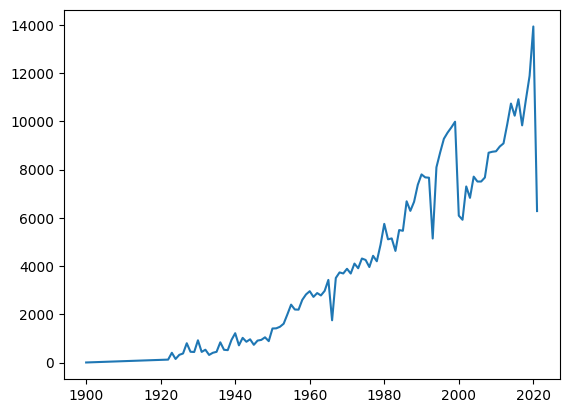

In [ ]:
plt.plot(df.groupby(df['release_date'].dt.year).size())
plt.show()

In [ ]:
pd.crosstab(df['release_date'].dt.year, df['release_date'].dt.month)

release_date,1,2,3,4,5,6,7,8,9,10,11,12
release_date,,,,,,,,,,,,
1900,1,0,0,0,0,0,0,0,0,0,0,0
1922,7,6,39,18,0,50,0,0,0,0,0,0
1923,3,2,21,0,0,0,20,0,0,0,0,357
1924,32,0,20,0,0,0,80,1,0,0,0,13
1925,22,0,216,41,0,0,19,18,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,656,585,777,658,709,891,644,601,861,931,1044,1479
2018,703,640,759,774,797,889,668,770,892,1019,1279,1703
2019,577,690,802,840,995,908,1075,816,1033,1143,1357,1656


In [ ]:
df = df.drop(df[df["release_date"].dt.year == 1900].index)
pd.crosstab(df['release_date'].dt.year, df['release_date'].dt.month)

release_date,1,2,3,4,5,6,7,8,9,10,11,12
release_date,,,,,,,,,,,,
1922,7,6,39,18,0,50,0,0,0,0,0,0
1923,3,2,21,0,0,0,20,0,0,0,0,357
1924,32,0,20,0,0,0,80,1,0,0,0,13
1925,22,0,216,41,0,0,19,18,0,0,2,0
1926,104,0,0,42,42,0,140,29,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,656,585,777,658,709,891,644,601,861,931,1044,1479
2018,703,640,759,774,797,889,668,770,892,1019,1279,1703
2019,577,690,802,840,995,908,1075,816,1033,1143,1357,1656


In [ ]:
df[df['release_date'].dt.year >= 2000].info()

<class 'pandas.core.frame.DataFrame'>
Index: 195405 entries, 39501 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                195405 non-null  object        
 1   name              195405 non-null  object        
 2   popularity        195405 non-null  int64         
 3   duration_ms       195405 non-null  int64         
 4   explicit          195405 non-null  int64         
 5   artists           195405 non-null  object        
 6   id_artists        195405 non-null  object        
 7   release_date      195405 non-null  datetime64[ns]
 8   danceability      195405 non-null  float64       
 9   energy            195405 non-null  float64       
 10  key               195405 non-null  int64         
 11  loudness          195405 non-null  float64       
 12  mode              195405 non-null  int64         
 13  speechiness       195405 non-null  float64       
 14  acous

for artists attribute, there are many artist in one song

In [ ]:
df['n_artists'] = df['artists'].apply(lambda x: len(x.split(',')))

In [ ]:
df['n_artists'].value_counts()

n_artists
1     368899
2      56299
3      14717
4       4178
5       1695
6        754
7        455
8        253
9        234
10       160
11        90
20        40
12        37
17        36
13        36
15        36
16        29
14        20
18         9
19         7
31         3
26         3
30         3
23         3
25         2
21         2
24         1
32         1
40         1
29         1
28         1
55         1
42         1
22         1
58         1
Name: count, dtype: int64

<Axes: xlabel='n_artists'>

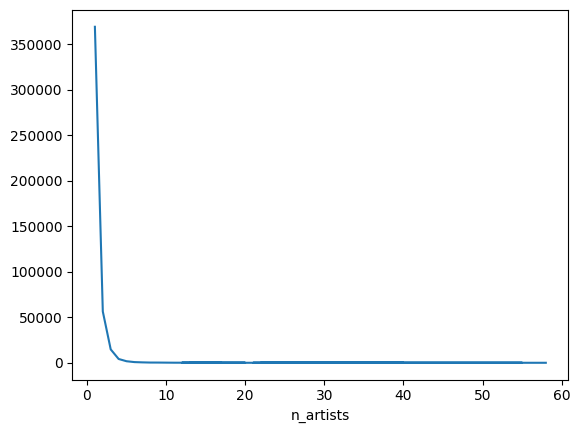

In [ ]:
df['n_artists'].value_counts().plot()

from the data resource platform state that if speechiness greater than 0.66 that probably made entirely of spoken word

In [ ]:
df['speech_mode'] = df['speechiness'].apply(lambda x: 1 if x > 0.66 else 0)

from the data the song that has release on 1900 has only 1 song

In [ ]:
df = df[df['release_date'].dt.year != 1900]

# EDA

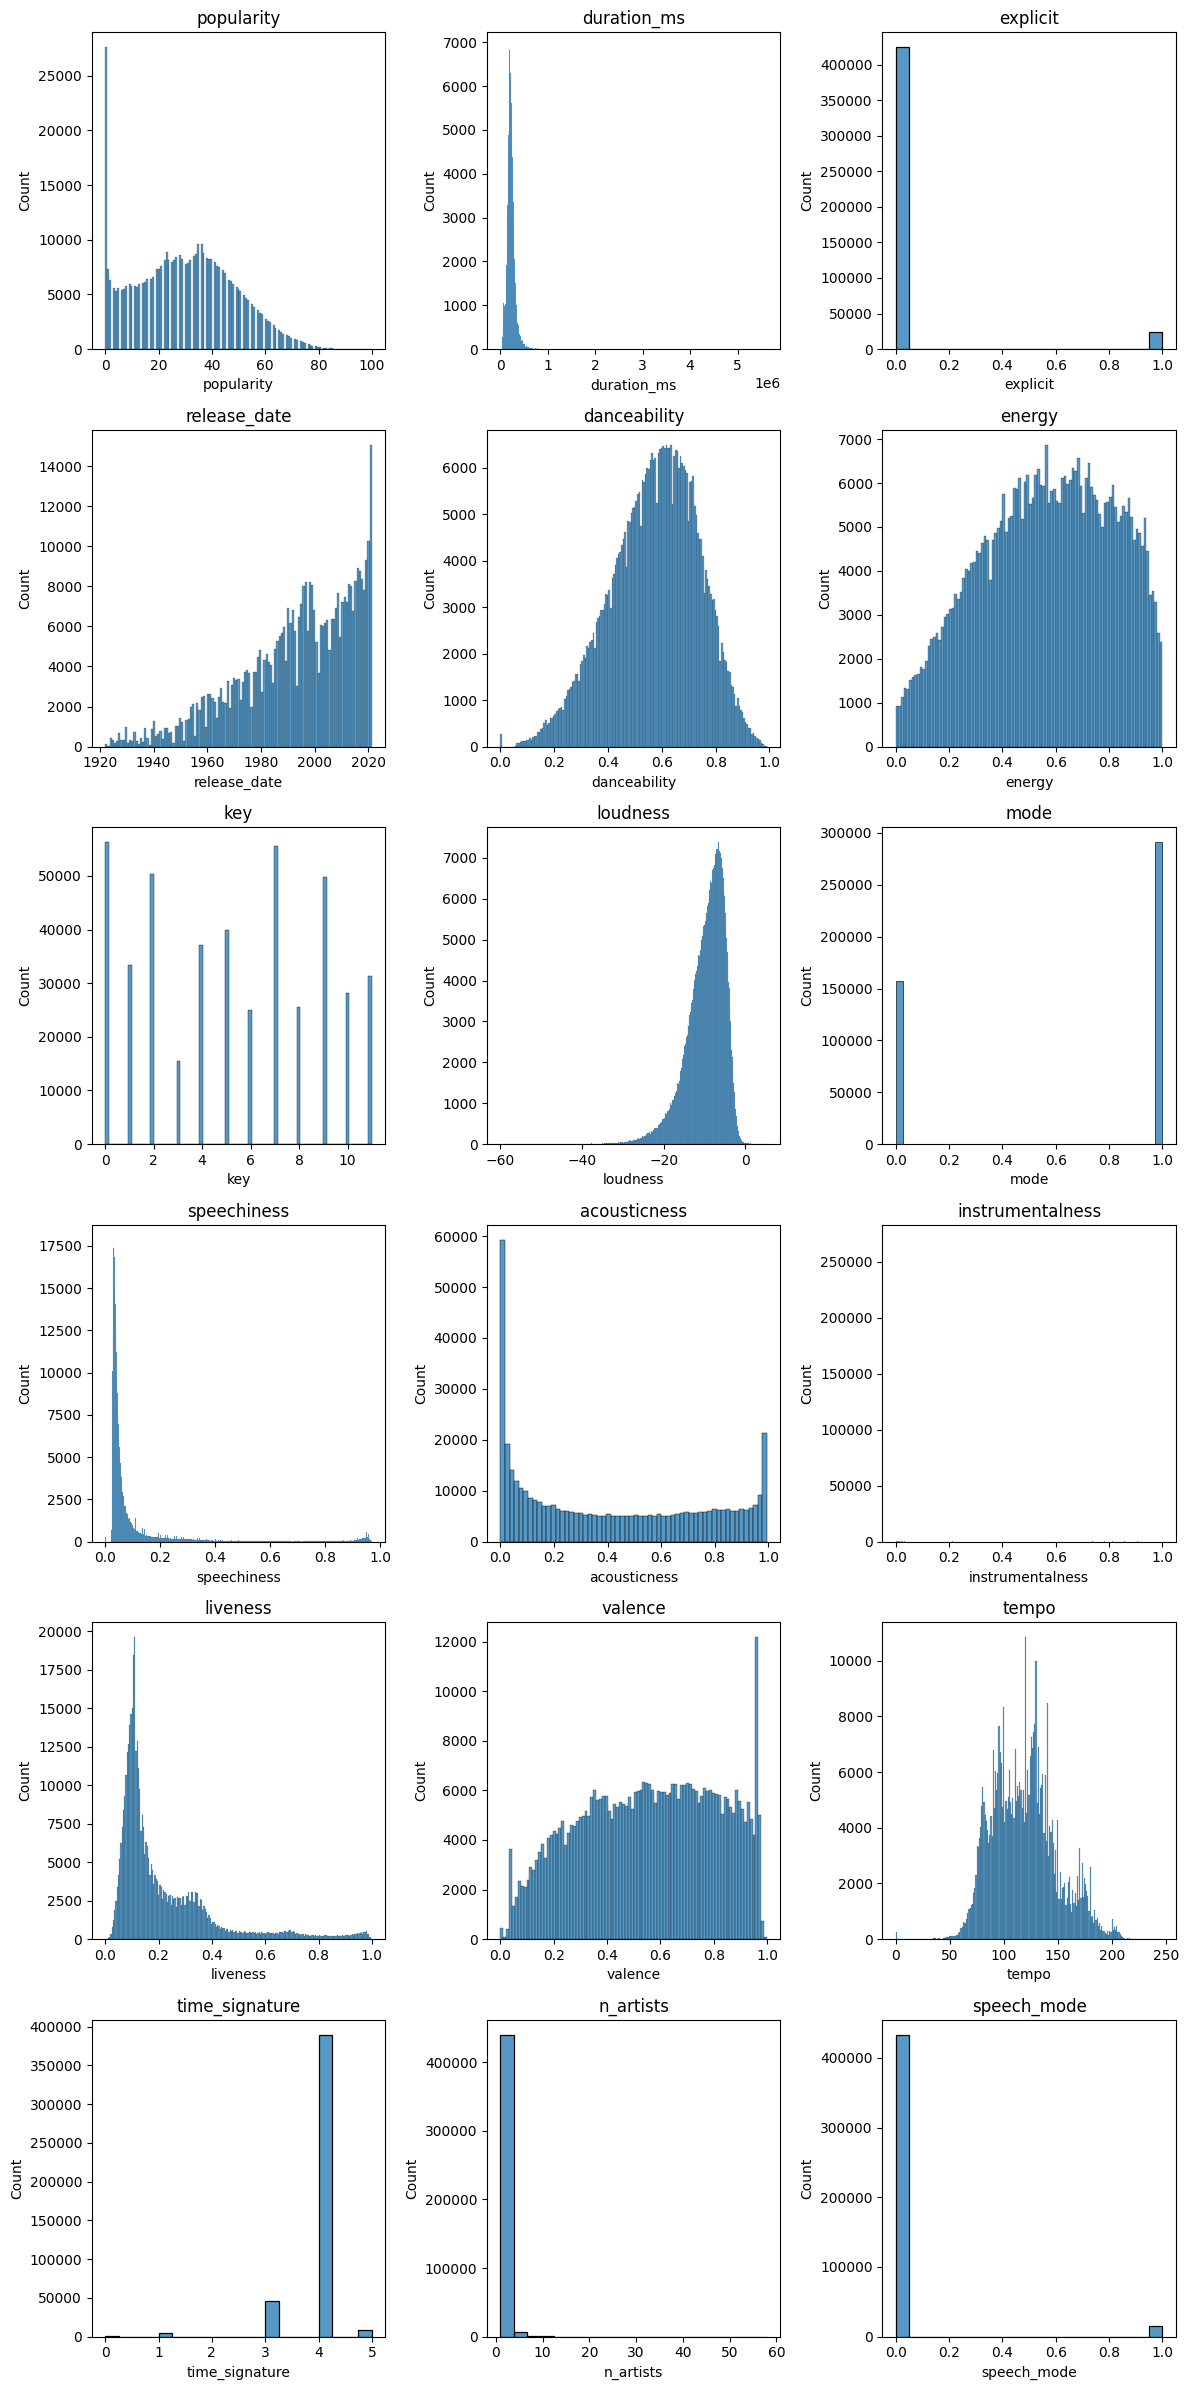

In [ ]:
import math

num_cols = len(df.select_dtypes(exclude=['object']).columns)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))

for i, col in enumerate(df.select_dtypes(exclude=['object']).columns):
    r = i // cols
    c = i % cols
    ax = axs[r, c]
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

this chart show the number of released song in each month
we can summarized that the artist often release their sonf in the January

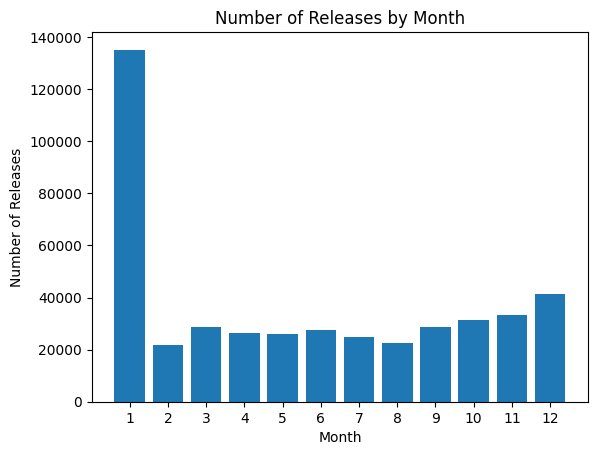

In [ ]:
month_popular = df["release_date"].dt.month.value_counts().sort_index()
plt.bar(month_popular.index, month_popular.values)
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Month')
plt.xticks(range(1, 13))
plt.show()

the song that released in January and December will have lowest popularity

([<matplotlib.axis.XTick at 0x7ab67d874880>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

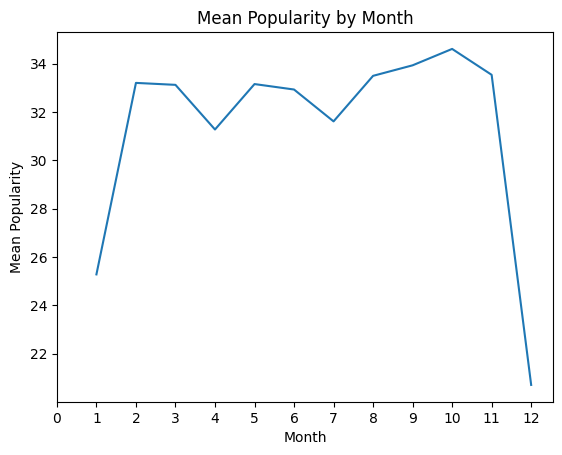

In [ ]:
mean_popularity_per_month = df.groupby(df['release_date'].dt.month)['popularity'].mean()
mean_popularity_per_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Month')
plt.xticks(range(0, 13))

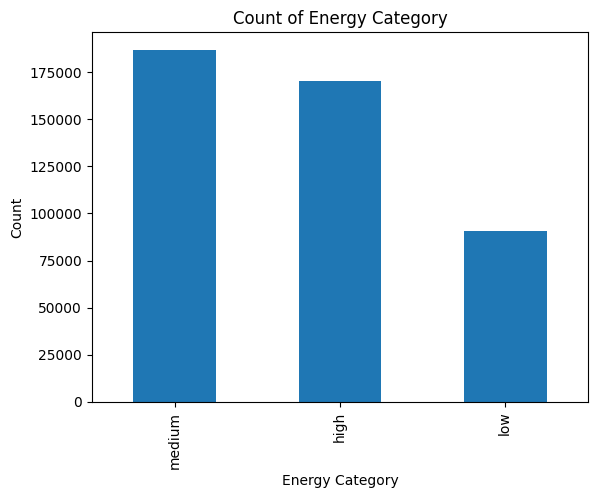

In [ ]:
df['energy_category'] = pd.cut(df['energy'], bins=3, labels=['low', 'medium', 'high'])
df['energy_category'].value_counts()
df['energy_category'].value_counts().plot(kind='bar')
plt.xlabel('Energy Category')
plt.ylabel('Count')
plt.title('Count of Energy Category')
plt.show()

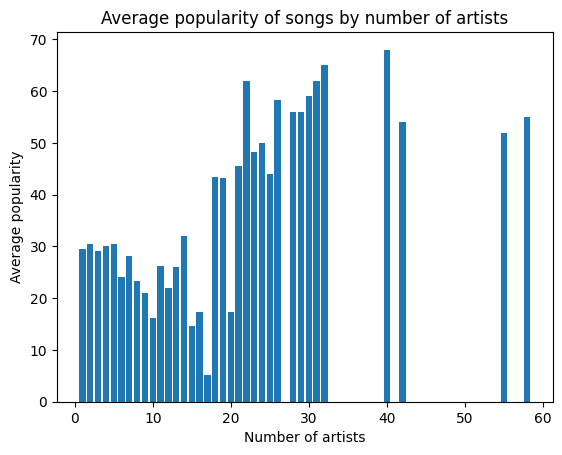

In [ ]:
n_art_pop = pd.crosstab(df['n_artists'], df['popularity'])
n_art_pop['avg_popularity'] = n_art_pop.apply(lambda x: (x.index * x).sum() / x.sum(), axis=1)
plt.bar(n_art_pop.index, n_art_pop['avg_popularity'])
plt.xlabel('Number of artists')
plt.ylabel('Average popularity')
plt.title('Average popularity of songs by number of artists')
plt.show()

This is bar show ing the relation between number of artist in a song and average popularity

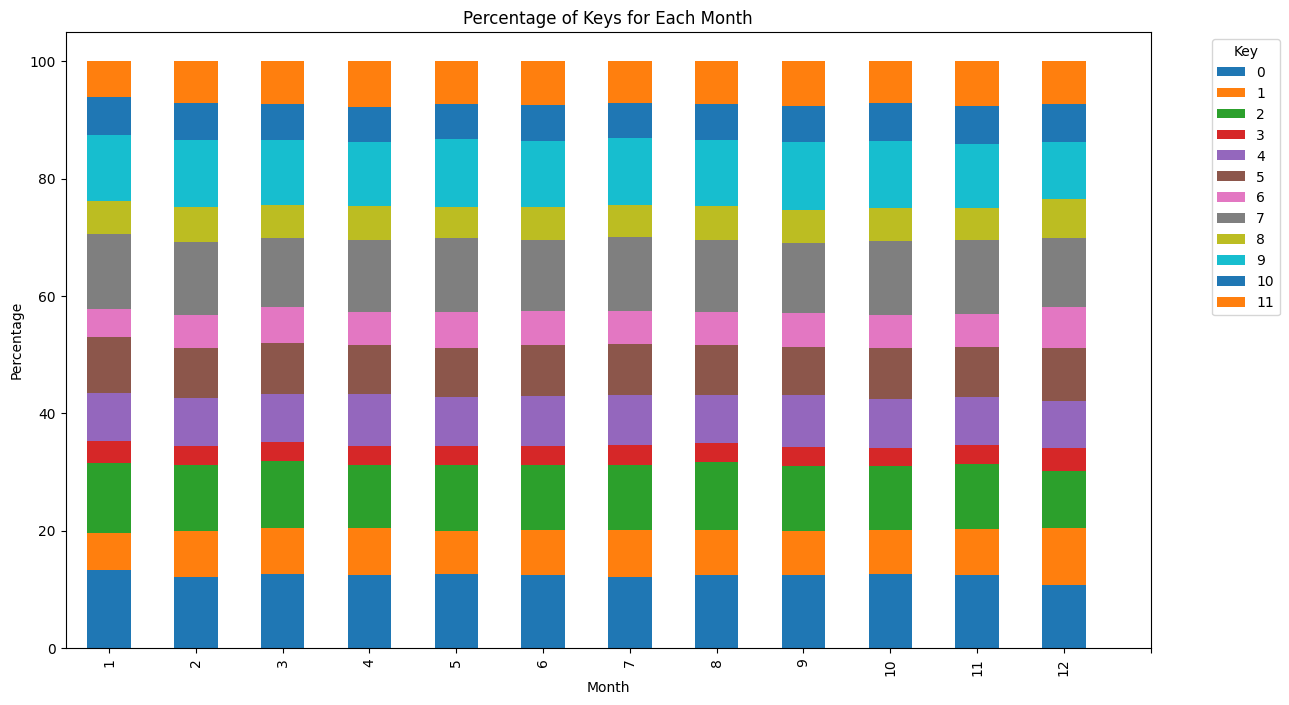

In [ ]:
df_cross = pd.crosstab(df['release_date'].dt.month, df['key'])

df_cross = df_cross.div(df_cross.sum(axis=1), axis=0) * 100

df_cross.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Percentage of Keys for Each Month')
plt.xticks(range(0, 13))
plt.legend(title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

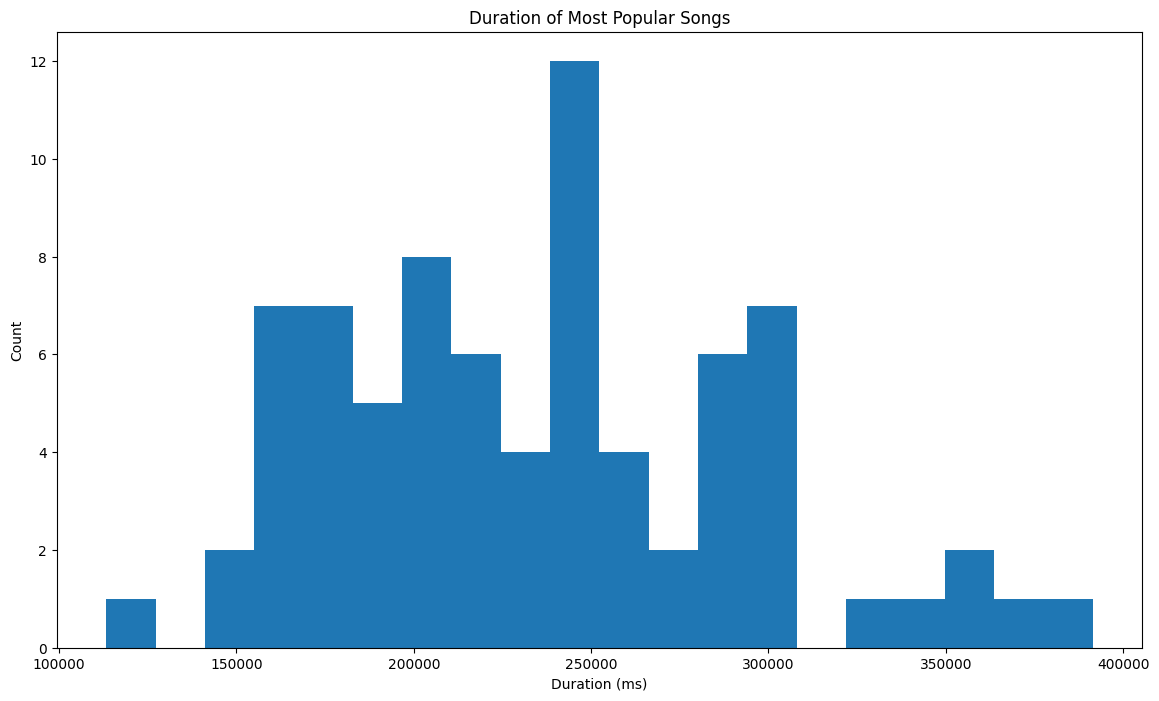

In [ ]:
most_popular_song_per_year = df.loc[df.groupby(df['release_date'].dt.year)['popularity'].idxmax()]
quartile_3 = df['popularity'].quantile(0.75)
most_popular_song_per_year = most_popular_song_per_year[most_popular_song_per_year['popularity'] > quartile_3]
average_duration = most_popular_song_per_year['duration_ms'].mean()

plt.figure(figsize=(14, 8))
plt.hist(most_popular_song_per_year['duration_ms'], bins=20)
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Duration of Most Popular Songs')
plt.show()

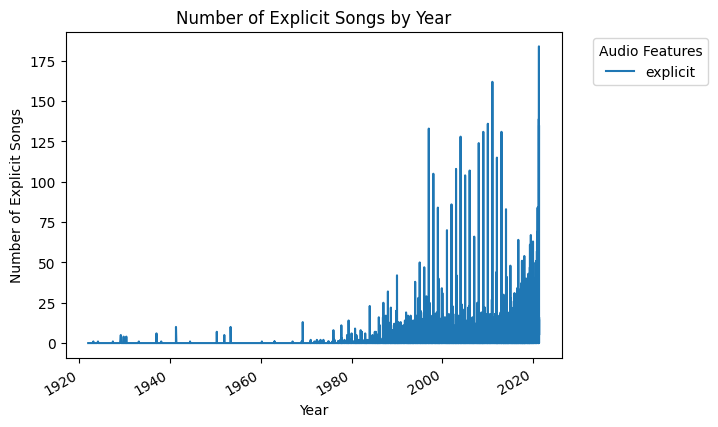

In [ ]:
df_explicit = df.copy()
df_explicit['explicit'] = df_explicit['explicit'].astype(bool)
df_explicit['explicit'] = df_explicit['explicit'].astype(int)
df_explicit = df_explicit.groupby('release_date')['explicit'].sum()
df_explicit.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Explicit Songs')
plt.title('Number of Explicit Songs by Year')
plt.legend(title='Audio Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#list of top 10 artists for popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
top_artists

artists
['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']    94.0
['Los Legendarios', 'Wisin', 'Jhay Cortez']                   94.0
['Bad Bunny', 'ROSALÍA']                                      93.0
['MEDUZA', 'Dermot Kennedy']                                  92.0
['Travis Scott', 'HVME']                                      92.0
['Nathan Evans', '220 KID', 'Billen Ted']                     92.0
['Rochy RD', 'Myke Towers', 'Nicki Nicole']                   92.0
['Bad Bunny', 'Jhay Cortez']                                  91.0
['Saweetie', 'Doja Cat']                                      90.0
['Maroon 5', 'Megan Thee Stallion']                           90.0
Name: popularity, dtype: float64

<ipython-input-32-b53961c40abf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists['release_month'] = top_artists['release_date'].dt.month


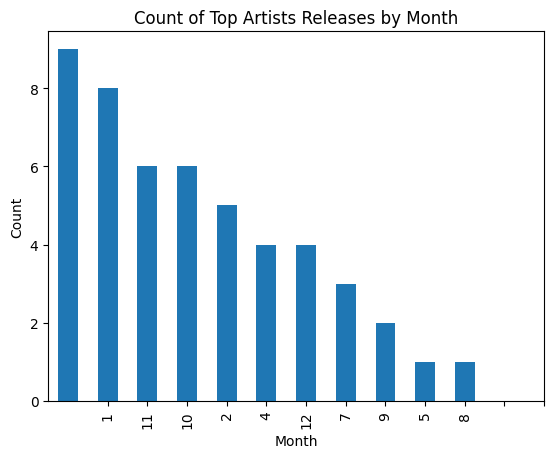

In [ ]:
top_artists = df.loc[df['popularity'] >= 90]
top_artists['release_month'] = top_artists['release_date'].dt.month
top_artists['release_month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Top Artists Releases by Month')
plt.xticks(range(1, 13))
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_artists,speech_mode
popularity,1.000000,0.023430,0.217129,0.174250,0.251193,0.013822,0.307576,-0.026004,-0.045544,-0.316790,-0.223269,-0.062078,-0.032053,0.058622,0.082961,-0.006809,-0.081904
duration_ms,0.023430,1.000000,-0.020706,-0.105247,0.030402,0.008104,0.009995,-0.025009,-0.134355,-0.064063,0.047695,0.009053,-0.145695,0.007912,0.037949,0.064727,-0.117418
explicit,0.217129,-0.020706,1.000000,0.165153,0.114221,0.010595,0.134904,-0.054830,0.124780,-0.144502,-0.069008,-0.016876,-0.024292,0.002187,0.046896,0.082006,-0.033693
danceability,0.174250,-0.105247,0.165153,1.000000,0.217638,0.017154,0.230969,-0.049447,0.185498,-0.228666,-0.193382,-0.124988,0.497506,-0.064232,0.147171,-0.011625,0.103771
energy,0.251193,0.030402,0.114221,0.217638,1.000000,0.037749,0.756196,-0.066318,-0.033722,-0.701365,-0.157889,0.129986,0.338557,0.217060,0.187348,-0.057352,-0.095521
key,0.013822,0.008104,0.010595,0.017154,0.037749,1.000000,0.029985,-0.134515,-0.008490,-0.025973,-0.002370,-0.008032,0.020452,0.004915,0.009162,-0.003539,-0.021096
loudness,0.307576,0.009995,0.134904,0.230969,0.756196,0.029985,1.000000,-0.044386,-0.140091,-0.511408,-0.302685,0.030421,0.233714,0.175455,0.158841,-0.076537,-0.191011
mode,-0.026004,-0.025009,-0.054830,-0.049447,-0.066318,-0.134515,-0.044386,1.000000,-0.016652,0.054332,-0.015028,0.008783,0.009490,0.007895,-0.018159,-0.015238,0.009205
speechiness,-0.045544,-0.134355,0.124780,0.185498,-0.033722,-0.008490,-0.140091,-0.016652,1.000000,0.075289,-0.088747,0.201817,0.055927,-0.088661,-0.108331,0.053559,0.872455
acousticness,-0.316790,-0.064063,-0.144502,-0.228666,-0.701365,-0.025973,-0.511408,0.054332,0.075289,1.000000,0.156133,-0.001941,-0.143487,-0.187679,-0.177824,0.074275,0.114761


this is the heatmap of correlation of each attribute in out dataset
if the correlation approached to 0  it means that both attributes have a small relationship

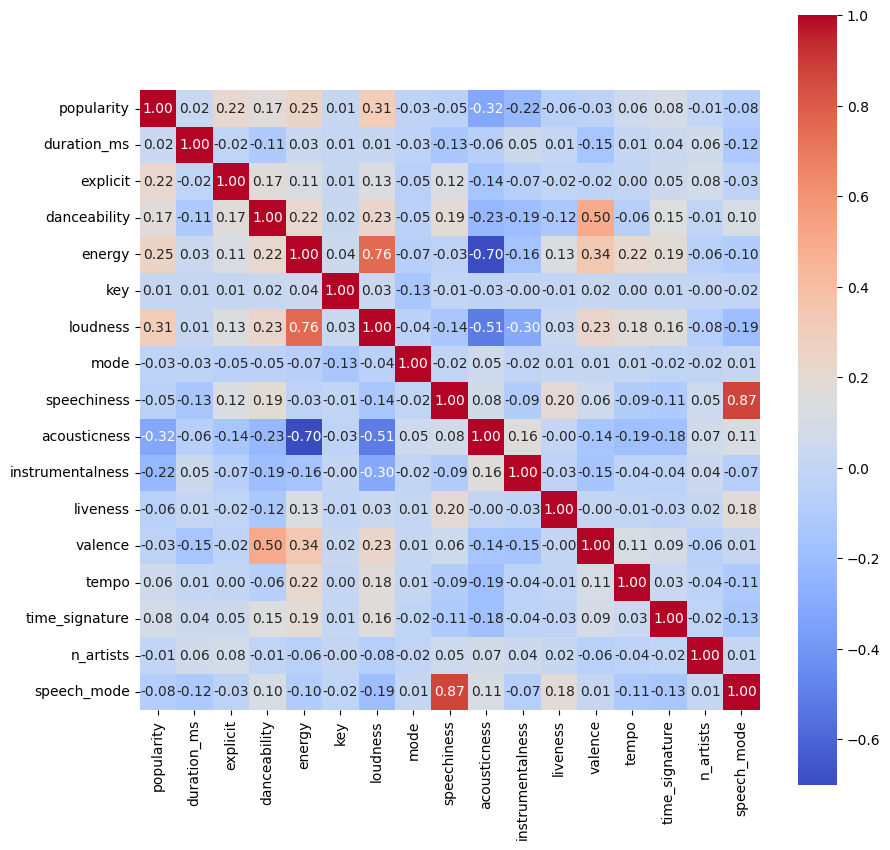

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.show()

In [ ]:
most_corr_list = list()

In [ ]:
row_indices, col_indices = np.where(correlation_matrix >= 0.5)

for row, col in zip(row_indices, col_indices):
    if row != col:
      most_corr_list.append([correlation_matrix.index[row], correlation_matrix.index[col], correlation_matrix.iloc[row, col], "pos"])
      print(f"Correlation >= 0.5 between '{correlation_matrix.index[row]}' and '{correlation_matrix.columns[col]}'")

Correlation >= 0.5 between 'energy' and 'loudness'
Correlation >= 0.5 between 'loudness' and 'energy'
Correlation >= 0.5 between 'speechiness' and 'speech_mode'
Correlation >= 0.5 between 'speech_mode' and 'speechiness'


In [ ]:
row_indices, col_indices = np.where(correlation_matrix <= -0.5)

for row, col in zip(row_indices, col_indices):
    if row != col:
      most_corr_list.append([correlation_matrix.index[row], correlation_matrix.index[col],correlation_matrix.iloc[row, col], "neg"])
      print(f"Correlation <= -0.5 between '{correlation_matrix.index[row]}' and '{correlation_matrix.columns[col]}'")

Correlation <= -0.5 between 'energy' and 'acousticness'
Correlation <= -0.5 between 'loudness' and 'acousticness'
Correlation <= -0.5 between 'acousticness' and 'energy'
Correlation <= -0.5 between 'acousticness' and 'loudness'


In [ ]:
most_corr_list

[['energy', 'loudness', 0.7561956025942026, 'pos'],
 ['loudness', 'energy', 0.7561956025942026, 'pos'],
 ['speechiness', 'speech_mode', 0.8724554368725751, 'pos'],
 ['speech_mode', 'speechiness', 0.8724554368725751, 'pos'],
 ['energy', 'acousticness', -0.7013645213478671, 'neg'],
 ['loudness', 'acousticness', -0.5114078567541162, 'neg'],
 ['acousticness', 'energy', -0.7013645213478671, 'neg'],
 ['acousticness', 'loudness', -0.5114078567541162, 'neg']]

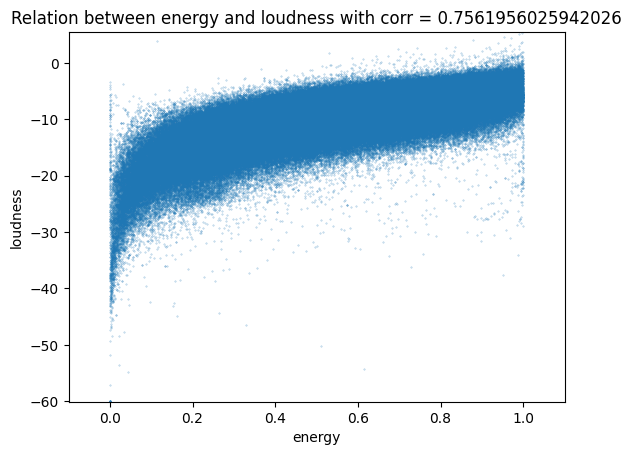

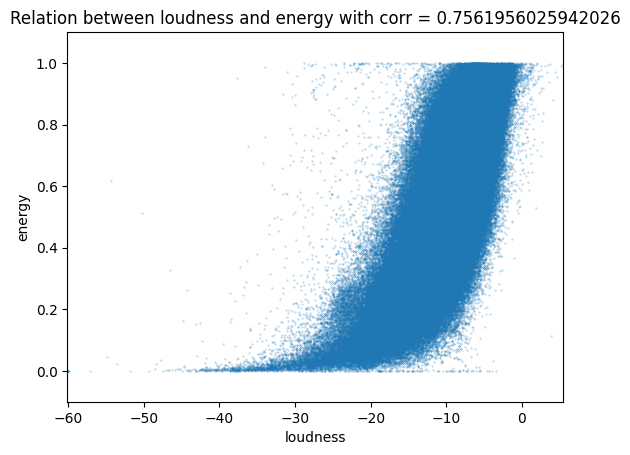

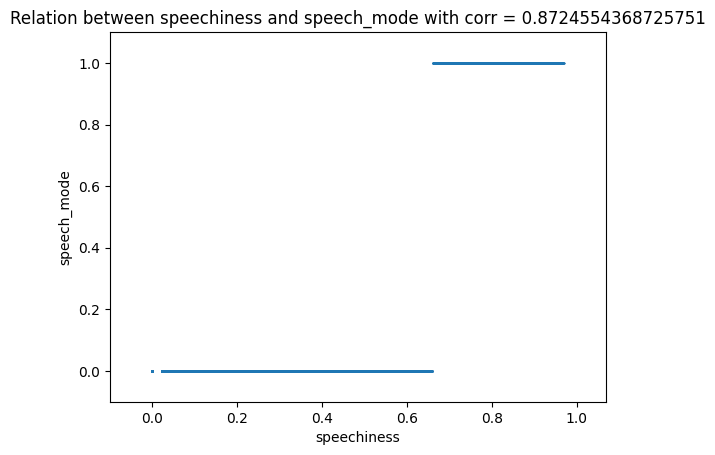

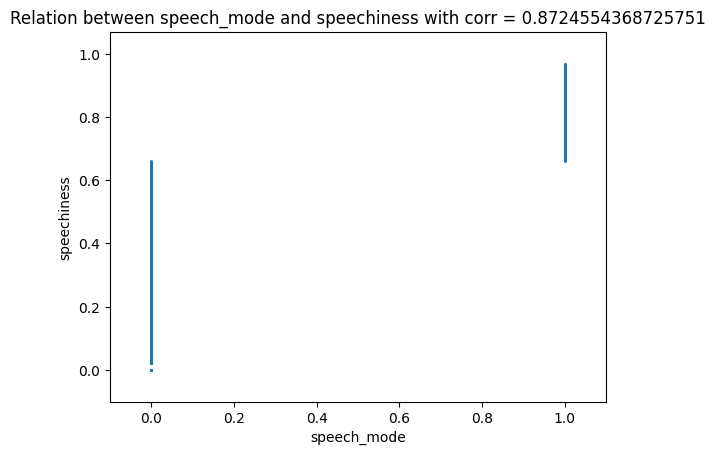

In [ ]:
i = 1
for item in most_corr_list:
    if item[3] == 'pos':
        plt.scatter(df[item[0]], df[item[1]], s=0.1, alpha=0.5)
        plt.xlabel(item[0])
        plt.ylabel(item[1])
        plt.title(f"Relation between {item[0]} and {item[1]} with corr = {item[2]}")

        plt.axis([min(df[item[0]])-0.1, max(df[item[0]])+0.1, min(df[item[1]])-0.1, max(df[item[1]])+0.1])

        plt.show()
        i += 1


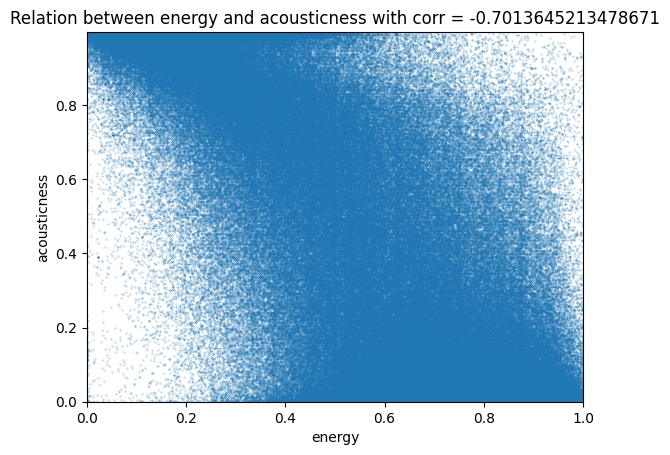

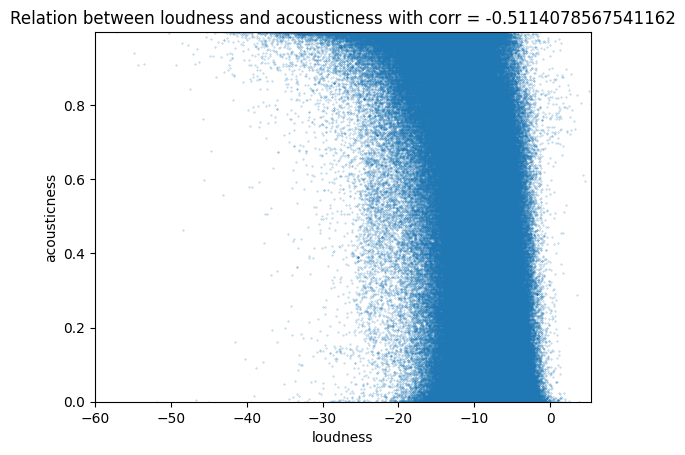

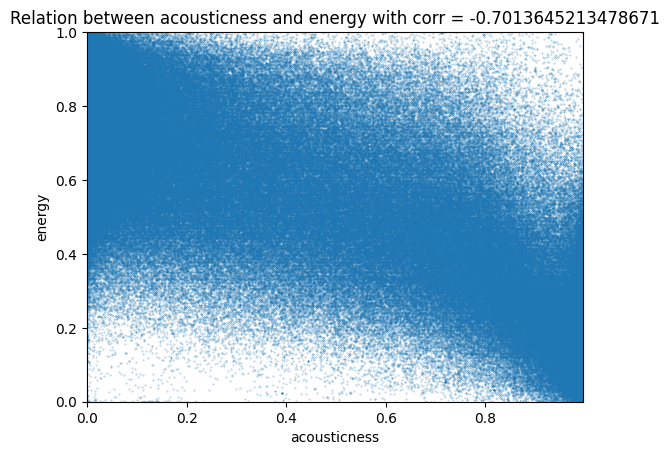

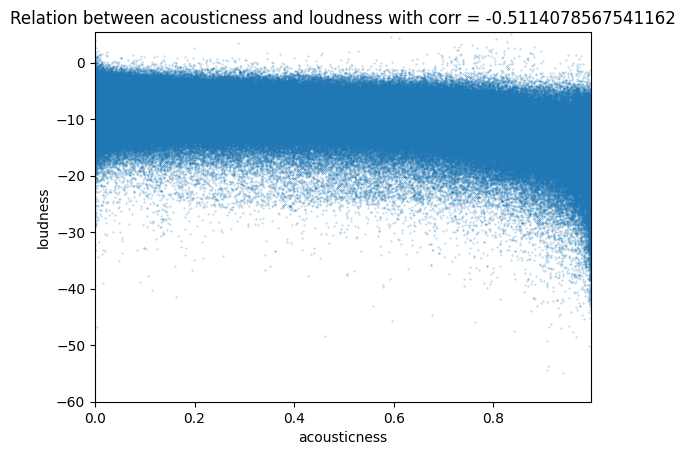

In [ ]:
i = 1
for item in most_corr_list:
    if item[3] == 'neg':
        plt.scatter(df[item[0]], df[item[1]], s=0.1, alpha=0.5)
        plt.xlabel(item[0])
        plt.ylabel(item[1])
        plt.title(f"Relation between {item[0]} and {item[1]} with corr = {item[2]}")

        plt.axis([min(df[item[0]]), max(df[item[0]]), min(df[item[1]]), max(df[item[1]])])
        plt.show()
        i += 1


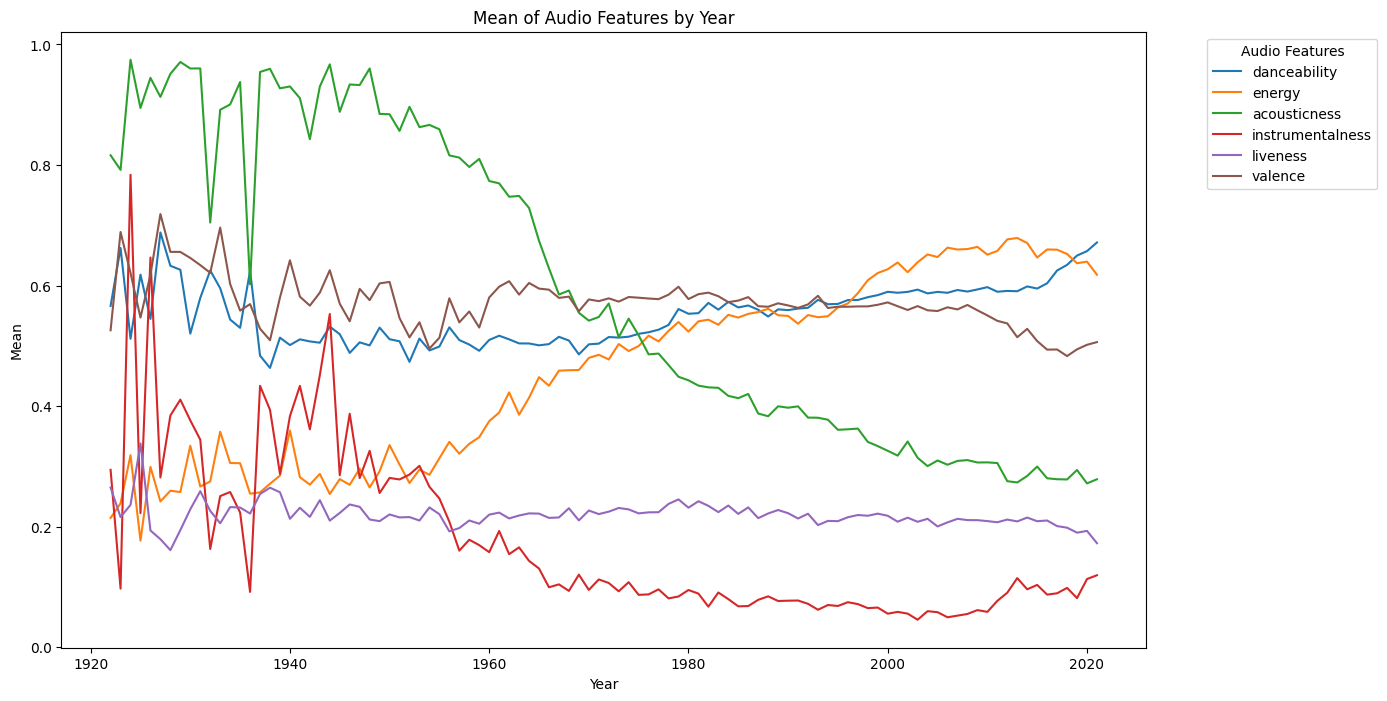

In [ ]:
df_audio_feature =df.copy()
df_audio_feature = df[df['release_date'].dt.year.notna()]
df_yearly = df.groupby(df_audio_feature['release_date'].dt.year)[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']].mean()
df_yearly

df_yearly.plot(kind='line', figsize=(14, 8))
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean of Audio Features by Year')

plt.legend(title='Audio Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Modeling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448009 entries, 0 to 586671
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                448009 non-null  object        
 1   name              448009 non-null  object        
 2   popularity        448009 non-null  int64         
 3   duration_ms       448009 non-null  int64         
 4   explicit          448009 non-null  int64         
 5   artists           448009 non-null  object        
 6   id_artists        448009 non-null  object        
 7   release_date      448009 non-null  datetime64[ns]
 8   danceability      448009 non-null  float64       
 9   energy            448009 non-null  float64       
 10  key               448009 non-null  int64         
 11  loudness          448009 non-null  float64       
 12  mode              448009 non-null  int64         
 13  speechiness       448009 non-null  float64       
 14  acousticn

In [ ]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_artists,speech_mode,energy_category
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1,0,medium
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1,1,low
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,0,low
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1,0,low
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,0.1530,0.996,0.9330,0.148,0.612,75.595,3,1,0,low


## Regression

Select the attribute that suitable for prediction from the relative values.(refered by correlation)

In [ ]:
selectCol = ['loudness','acousticness','valence','tempo','time_signature','instrumentalness','liveness','speech_mode','mode']
train_df = df[selectCol]
train_df

,loudness,acousticness,valence,tempo,time_signature,instrumentalness,liveness,speech_mode,mode
0,-13.338,0.674,0.1270,104.851,3,0.744000,0.1510,0,1
1,-22.136,0.797,0.6550,102.009,1,0.000000,0.1480,1,1
2,-21.180,0.994,0.4570,130.418,5,0.021800,0.2120,0,1
3,-27.961,0.995,0.3970,169.980,3,0.918000,0.1040,0,1
9,-23.228,0.996,0.6120,75.595,3,0.933000,0.1480,0,1
...,...,...,...,...,...,...,...,...,...
586667,-7.471,0.785,0.2110,131.896,4,0.000000,0.0648,0,0
586668,-5.223,0.141,0.6860,150.091,4,0.000297,0.0924,0,1
586669,-12.823,0.895,0.0663,145.095,4,0.000150,0.0874,0,0
586670,-6.212,0.206,0.4380,90.029,4,0.000003,0.3050,0,1


Add the target attribute to the test_df to be tested

In [ ]:
test_df = train_df.copy()
test_df['energy'] = df['energy']

Split the data into training and testing sets. Then train the model by using lightgbm.

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

X = df[selectCol]
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LGBMRegressor()

regr.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 336006, number of used features: 9
[LightGBM] [Info] Start training from score 0.564509


LGBMRegressor()

In [ ]:
score = regr.score(X_test, y_test)
print(f"The score is: {score}")

The score is: 0.8044221524248529


The test results found that there was a chance of being correct approximately 0.8.

Make a prediction and compare the difference between the actual value and the predicted value.
This line represents the ideal case where the predicted values perfectly match the actual values.

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

The results show that the numerical error is very small.

Identify the incorrect value.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Compare the difference between the residual and the actual values. This line helps to visualize how residuals are distributed around zero. Ideally, residuals should be randomly scattered around this line if the model is well-fitted.

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = regr.predict(X_test)
residuals = y_test - predictions

plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

The results indicate that residual values are closely distributed around the red line

In [ ]:
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [selectCol[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


## clustering

In [ ]:
col = df.select_dtypes(exclude=['object', 'datetime64']).columns.tolist()
col


select columns that will be trained

In [ ]:
selectCol = ['acousticness', 'danceability',  'energy','speechiness','valence']
train_df = df[selectCol]

In [ ]:
train_df

In [ ]:
train_df.info()

normalized data inot log scale

In [ ]:
normalized_df = np.log(train_df + 1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalized_df)

In [ ]:
kmeans.labels_

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=selectCol)

In [ ]:
sns.clustermap(pd.DataFrame(kmeans.cluster_centers_, columns=selectCol), vmin=0, vmax=1, annot=True)

if the speechiness is less and acousticness is more, danceability will be more and more energy <br>
if the speechiness is more, energy will be more <br>
if speechiness and acoustic are less, energy will be less and valence will be more(very happy) <br>
if speechiness and acousticness are less and daceability about 0.67, the valence will be less (sad)


## Monte Carlo

Plot empirical cumulative density function of energy

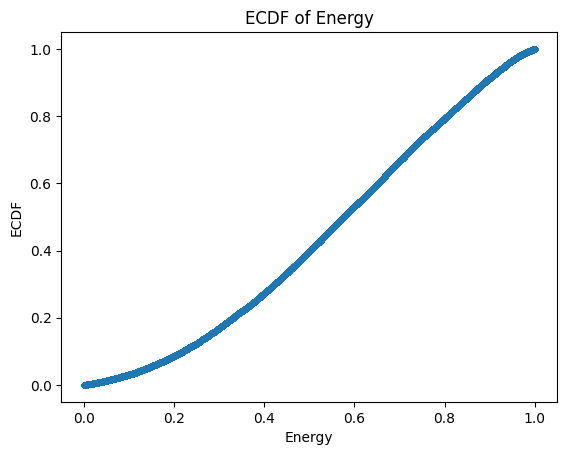

In [ ]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x, y = ecdf(df['energy'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Energy')
plt.ylabel('ECDF')
plt.title('ECDF of Energy')
plt.show()

compares the ECDF of the actual energy data with ECDFs generated from Monte Carlo simulations for different sample sizes.

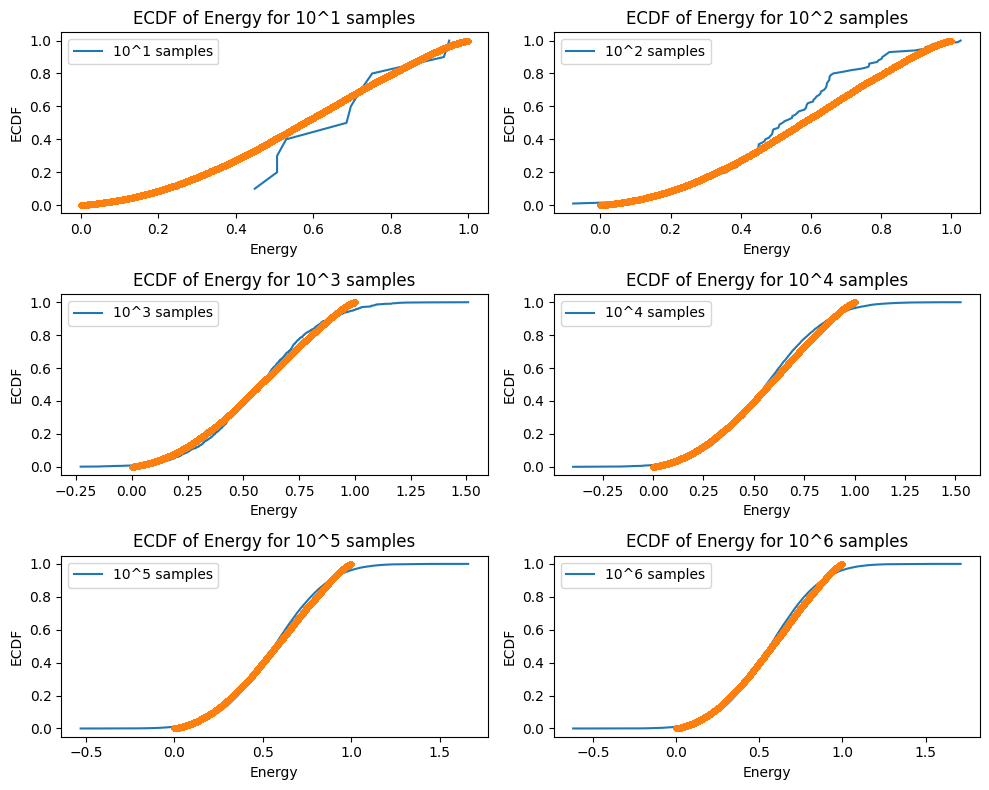

In [ ]:
np.random.seed(42)
energy = df['energy']
energy_mean = energy.mean()
energy_std = energy.std()

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.ravel()

for i, n in enumerate(range(1, 7)):
    num_samples = 10**n
    energy_simulated = np.random.normal(energy_mean, energy_std, num_samples)
    x, y = ecdf(energy)
    x_theor, y_theor = ecdf(energy_simulated)
    axs[i].plot(x_theor, y_theor, label=f'10^{n} samples')
    axs[i].plot(x, y, marker='.', linestyle='none')
    axs[i].set_xlabel('Energy')
    axs[i].set_ylabel('ECDF')
    axs[i].set_title(f'ECDF of Energy for 10^{n} samples')
    axs[i].legend()

plt.tight_layout()
plt.show()

From the graph it can be seen that the larger the random number, the ecdf function is closer to the actual ecdf value of the original data.